Step 1: Load the data

In [1]:
import pandas as pd
import numpy as np


pd.set_option("mode.copy_on_write", True)

In [2]:
death = pd.read_csv(
    r"C:\PDS\opioid-2023-kml\00_Data\Deaths_Data\state_text_files\drug_deaths.txt",
    delimiter="\t",
)

In [3]:
death.head(5)

,County,Year,County Code,Deaths
0,"Adams County, IL",2015,17001.0,14.0
1,"Adams County, OH",2012,39001.0,10.0
2,"Adams County, OH",2014,39001.0,10.0
3,"Adams County, OH",2015,39001.0,13.0
4,"Alachua County, FL",2003,12001.0,11.0


In [4]:
population = pd.read_csv(
    r"C:\PDS\opioid-2023-kml\00_Data\Population_Data\population.csv"
)
population.head(5)

,FIPS,State,State_FIPS,County_FIPS,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,1001,AL,1,1,45909.0,46800.0,48366.0,49676.0,51328.0,52405.0,53277.0,54135.0,54761.0,55229.0,54970.0,54747.0,54922.0,54903.0,55302.0
1,1003,AL,1,3,147957.0,151509.0,156266.0,160970.0,168121.0,172404.0,175827.0,179406.0,183121.0,186579.0,190203.0,194978.0,199306.0,203101.0,207787.0
2,1005,AL,1,5,28653.0,28594.0,28287.0,28027.0,27861.0,27757.0,27808.0,27657.0,27325.0,27344.0,27172.0,26946.0,26768.0,26300.0,25828.0
3,1007,AL,1,7,21199.0,21399.0,21721.0,22042.0,22099.0,22438.0,22705.0,22941.0,22858.0,22736.0,22657.0,22510.0,22541.0,22553.0,22590.0
4,1009,AL,1,9,52551.0,53457.0,54124.0,54624.0,55485.0,56240.0,57055.0,57341.0,57372.0,57561.0,57585.0,57630.0,57536.0,57535.0,57487.0


Step 2: Clean the County Code
* We will merge death's Couty Code with populaiton's FIPS. Couty code is now a float so we need to convert it to int.

In [5]:
death["County Code"] = pd.to_numeric(
    death["County Code"], errors="coerce"
)  # Convert to numeric
death["County Code"] = death["County Code"].astype(int)

Step 3: Subset the population data based on states and years
* We can get the state code from the County Code. In this way, we double check if we get the correct state. Also we can subset population df with only the relevant states, and we can increase our data processing time by subsetting it.

In [6]:
import math


death["State Code"] = death["County Code"].apply(lambda x: float(math.floor(x / 1000)))


unique_state_code = death["State Code"].unique()


print(unique_state_code)

[17. 39. 12. 47. 48. 53. 54. 20. 41. 31. 56.]


* There are 12 unique state code from the death dataset: [17. 39. 12. 47. 48. 53. 54. 20. 41. 31. 56.]. So we selected the data correctly
* Next step we subset the popultion data based on the state code.

In [7]:
subset_population = population[population["State_FIPS"].isin(unique_state_code)]

In [8]:
print(death["Year"].min())
print(death["Year"].max())

2003
2015


In [9]:
subset_population = subset_population.drop(["2002", "2016"], axis=1)

In [10]:
subset_population

,FIPS,State,State_FIPS,County_FIPS,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
315,12001,FL,12,1,227022.0,229867.0,233756.0,239506.0,242685.0,244888.0,246657.0,247624.0,249879.0,251596.0,252585.0,255606.0,259215.0
316,12003,FL,12,3,23555.0,24142.0,24832.0,25571.0,26212.0,26725.0,27124.0,27067.0,27055.0,27059.0,27008.0,27123.0,27357.0
317,12005,FL,12,5,155044.0,158804.0,162917.0,165644.0,165345.0,166267.0,167464.0,169209.0,169587.0,171818.0,174704.0,178435.0,181678.0
318,12007,FL,12,7,27035.0,27703.0,28098.0,28506.0,28825.0,28961.0,28979.0,28536.0,28430.0,27052.0,26804.0,26562.0,26759.0
319,12009,FL,12,9,504847.0,518722.0,529907.0,535138.0,539719.0,542378.0,542109.0,544000.0,544442.0,547119.0,550478.0,555838.0,566133.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3132,56037,WY,56,37,37450.0,38026.0,38739.0,39749.0,41470.0,42358.0,44133.0,43580.0,44000.0,45032.0,45189.0,44996.0,44780.0
3133,56039,WY,56,39,19066.0,19467.0,19632.0,20014.0,20472.0,20988.0,21232.0,21298.0,21422.0,21643.0,22335.0,22801.0,23083.0
3134,56041,WY,56,41,19480.0,19470.0,19494.0,19709.0,20171.0,20613.0,21054.0,21090.0,20901.0,21008.0,20969.0,20835.0,20777.0
3135,56043,WY,56,43,7976.0,7960.0,8022.0,7979.0,8169.0,8229.0,8423.0,8531.0,8451.0,8410.0,8417.0,8277.0,8282.0


Step 4: Check the valid counties number

In [11]:
print(subset_population["FIPS"].nunique())
print(death["County Code"].nunique())

957
312


#### Lets merge the two datasets

In [12]:
subset_population.head(10)

,FIPS,State,State_FIPS,County_FIPS,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
315,12001,FL,12,1,227022.0,229867.0,233756.0,239506.0,242685.0,244888.0,246657.0,247624.0,249879.0,251596.0,252585.0,255606.0,259215.0
316,12003,FL,12,3,23555.0,24142.0,24832.0,25571.0,26212.0,26725.0,27124.0,27067.0,27055.0,27059.0,27008.0,27123.0,27357.0
317,12005,FL,12,5,155044.0,158804.0,162917.0,165644.0,165345.0,166267.0,167464.0,169209.0,169587.0,171818.0,174704.0,178435.0,181678.0
318,12007,FL,12,7,27035.0,27703.0,28098.0,28506.0,28825.0,28961.0,28979.0,28536.0,28430.0,27052.0,26804.0,26562.0,26759.0
319,12009,FL,12,9,504847.0,518722.0,529907.0,535138.0,539719.0,542378.0,542109.0,544000.0,544442.0,547119.0,550478.0,555838.0,566133.0
320,12011,FL,12,11,1707543.0,1725461.0,1746896.0,1739348.0,1720825.0,1723633.0,1733310.0,1752843.0,1787096.0,1814468.0,1836869.0,1861259.0,1885435.0
321,12013,FL,12,13,13293.0,13445.0,13850.0,13997.0,14222.0,14351.0,14692.0,14657.0,14725.0,14673.0,14582.0,14456.0,14412.0
322,12015,FL,12,15,153235.0,157755.0,155262.0,157099.0,159742.0,160467.0,159629.0,159897.0,159926.0,162840.0,164801.0,168208.0,172607.0
323,12017,FL,12,17,126215.0,129840.0,133791.0,137826.0,140974.0,142122.0,141381.0,141177.0,139782.0,139215.0,138888.0,138907.0,140397.0
324,12019,FL,12,19,155620.0,163238.0,169418.0,178339.0,184256.0,187289.0,189101.0,191453.0,192335.0,193909.0,195732.0,198687.0,202552.0


In [13]:
death = death.rename(columns={"County Code": "FIPS"})

In [14]:
death.head(10)

,County,Year,FIPS,Deaths,State Code
0,"Adams County, IL",2015,17001,14.0,17.0
1,"Adams County, OH",2012,39001,10.0,39.0
2,"Adams County, OH",2014,39001,10.0,39.0
3,"Adams County, OH",2015,39001,13.0,39.0
4,"Alachua County, FL",2003,12001,11.0,12.0
5,"Alachua County, FL",2007,12001,17.0,12.0
6,"Alachua County, FL",2009,12001,15.0,12.0
7,"Alachua County, FL",2010,12001,15.0,12.0
8,"Alachua County, FL",2011,12001,14.0,12.0
9,"Alachua County, FL",2012,12001,14.0,12.0


> I will get the 'Year' Column to equal the column of that matching Year and then insert that value into a column called 'Population' so to make the dataframe more digestable. 

In [15]:
subset_population.columns

Index(['FIPS', 'State', 'State_FIPS', 'County_FIPS', '2003', '2004', '2005',
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
       '2015'],
      dtype='object')

In [16]:
columns_to_melt = [
    "2003",
    "2004",
    "2005",
    "2006",
    "2007",
    "2008",
    "2009",
    "2010",
    "2011",
    "2012",
    "2013",
    "2014",
    "2015",
]  # update the list base on your year
melted_df = pd.melt(
    subset_population,
    id_vars=["FIPS", "State", "County_FIPS"],
    value_vars=columns_to_melt,
    var_name="Year",
    value_name="Population",
)
melted_df["Year"] = melted_df["Year"].astype(int)
melted_df

,FIPS,State,County_FIPS,Year,Population
0,12001,FL,1,2003,227022.0
1,12003,FL,3,2003,23555.0
2,12005,FL,5,2003,155044.0
3,12007,FL,7,2003,27035.0
4,12009,FL,9,2003,504847.0
...,...,...,...,...,...
12436,56037,WY,37,2015,44780.0
12437,56039,WY,39,2015,23083.0
12438,56041,WY,41,2015,20777.0
12439,56043,WY,43,2015,8282.0


In [17]:
merged_df = pd.merge(death, melted_df, on=["Year", "FIPS"], how="outer")
merged_df

,County,Year,FIPS,Deaths,State Code,State,County_FIPS,Population
0,"Adams County, IL",2015,17001,14.0,17.0,IL,1,66850.0
1,"Adams County, OH",2012,39001,10.0,39.0,OH,1,28288.0
2,"Adams County, OH",2014,39001,10.0,39.0,OH,1,28060.0
3,"Adams County, OH",2015,39001,13.0,39.0,OH,1,27919.0
4,"Alachua County, FL",2003,12001,11.0,12.0,FL,1,227022.0
...,...,...,...,...,...,...,...,...
12436,NaN,2015,56037,NaN,NaN,WY,37,44780.0
12437,NaN,2015,56039,NaN,NaN,WY,39,23083.0
12438,NaN,2015,56041,NaN,NaN,WY,41,20777.0
12439,NaN,2015,56043,NaN,NaN,WY,43,8282.0


In [18]:
merged_df.shape

(12441, 8)

In [19]:
adams_county_oh = merged_df[merged_df["County"] == "Adams County, OH"]
adams_county_oh

,County,Year,FIPS,Deaths,State Code,State,County_FIPS,Population
1,"Adams County, OH",2012,39001,10.0,39.0,OH,1,28288.0
2,"Adams County, OH",2014,39001,10.0,39.0,OH,1,28060.0
3,"Adams County, OH",2015,39001,13.0,39.0,OH,1,27919.0


In [20]:
merged_df = merged_df.drop(columns=["State Code", "County"])

In [21]:
merged_df.head(1)

,Year,FIPS,Deaths,State,County_FIPS,Population
0,2015,17001,14.0,IL,1,66850.0


In [22]:
# Texas has 254 counties, I am making sure no filtering as removed all counties yet.
len(merged_df[merged_df["State"] == "TX"]["County_FIPS"].unique())

254

In [23]:
len(merged_df[merged_df["State"] == "FL"]["County_FIPS"].unique())

67

In [24]:
len(merged_df[merged_df["State"] == "WA"]["County_FIPS"].unique())

39

> All counties are registerd in our dataframe

In [25]:
# Just get counties that have NAN Deaths

no_drug_deaths = merged_df[merged_df["Deaths"].isna()]
no_drug_deaths.shape

(10103, 6)

> There are 12,441 county/year combinations total.

> There are 10,103 observations with na values.

In [26]:
no_drug_deaths

,Year,FIPS,Deaths,State,County_FIPS,Population
2338,2003,12003,NaN,FL,3,23555.0
2339,2003,12007,NaN,FL,7,27035.0
2340,2003,12013,NaN,FL,13,13293.0
2341,2003,12015,NaN,FL,15,153235.0
2342,2003,12023,NaN,FL,23,59395.0
...,...,...,...,...,...,...
12436,2015,56037,NaN,WY,37,44780.0
12437,2015,56039,NaN,WY,39,23083.0
12438,2015,56041,NaN,WY,41,20777.0
12439,2015,56043,NaN,WY,43,8282.0


In [27]:
result = no_drug_deaths.groupby(["State", "County_FIPS"])["Year"].nunique() == 12

In [28]:
valid_combinations = result[result].index.tolist()
print(
    f"Valid State and County_FIPS combinations occurring for all 12 years: {valid_combinations}"
)

Valid State and County_FIPS combinations occurring for all 12 years: [('FL', 75), ('FL', 119), ('IL', 1), ('IL', 11), ('IL', 37), ('IL', 55), ('IL', 63), ('IL', 81), ('IL', 121), ('NE', 153), ('OH', 21), ('OH', 59), ('OH', 73), ('OH', 83), ('OH', 97), ('OH', 147), ('OH', 149), ('OH', 159), ('OH', 167), ('OR', 7), ('OR', 35), ('OR', 41), ('TN', 5), ('TN', 41), ('TN', 79), ('TN', 109), ('TN', 123), ('TN', 129), ('TN', 133), ('TN', 151), ('TN', 167), ('TN', 177), ('TX', 7), ('TX', 21), ('TX', 97), ('TX', 139), ('TX', 221), ('TX', 223), ('TX', 265), ('TX', 347), ('TX', 467), ('WA', 71), ('WV', 27), ('WV', 49), ('WV', 69), ('WY', 13), ('WY', 37)]


In [29]:
len(valid_combinations)

47

> 47 Counties have NO DEATH DATA across ALL years

> Given the large number of missing data for counties, we will try stochastic imputation using population and opioid imports to that county as predictors. 

> We will also take into account that the missing death values are probably due to anonymity therefore the death number must be less than 10.

> We will first start by using all our states: control and test states for testing/training purposes. Hopefully we will have enough context for the model to identify all missing data. 

> Our next step if it struggles with the 10,000 missing data observations is scoping our project to just larger counties which are not nearly missing as many values and therefore may be easier to impute. 

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import os
import pyarrow.parquet as pq
import pyarrow as pa

In [31]:
folder_path = r"C:\PDS\opioid-2023-kml\00_Data\Transaction_Data\06_PerCapitaMME"


parquet_files = [f for f in os.listdir(folder_path) if f.endswith(".parquet")]


merged_data = pd.DataFrame()


for file in parquet_files:
    file_path = os.path.join(folder_path, file)
    df = pd.read_parquet(file_path)
    merged_data = pd.concat([merged_data, df], ignore_index=True)


output_path = r"C:\PDS\opioid-2023-kml\00_Data\Transaction_Data\07_merged_parquet\all_states_merged.parquet"
table = pa.Table.from_pandas(merged_data)
pq.write_table(table, output_path)

In [32]:
all_states = pd.read_parquet(
    r"C:\PDS\opioid-2023-kml\00_Data\Transaction_Data\07_merged_parquet\all_states_merged.parquet"
)
all_states.head(10)

,BUYER_STATE,BUYER_COUNTY,TransactionYear,MME_Conversion_Factor,CALC_BASE_WT_IN_GM,morphine_equivalent_g,FIPS,county_population,per_capita_MME_mg
0,FL,ALACHUA,2006,27070.0,60803.410442,82596.618688,12001,239506,344.862420
1,FL,ALACHUA,2007,28245.5,69849.632145,95264.077667,12001,242685,392.542092
2,FL,ALACHUA,2008,30504.0,83288.688986,114679.035942,12001,244888,468.291774
3,FL,ALACHUA,2009,31367.5,101403.178507,141292.808080,12001,246657,572.831130
4,FL,ALACHUA,2010,30732.0,107187.575794,150921.955506,12001,247624,609.480323
5,FL,ALACHUA,2011,30138.0,103737.617610,145586.208854,12001,249879,582.626827
6,FL,ALACHUA,2012,28943.0,91186.510474,127724.752507,12001,251596,507.658121
7,FL,ALACHUA,2013,29643.0,77467.059270,107443.038991,12001,252585,425.373791
8,FL,ALACHUA,2014,28079.0,74002.252180,102635.251905,12001,255606,401.536943
9,FL,ALACHUA,2015,28037.0,75667.277565,105979.623503,12001,259215,408.848344


In [33]:
all_states = all_states.rename(columns={"TransactionYear": "Year"})

In [34]:
all_states.columns

Index(['BUYER_STATE', 'BUYER_COUNTY', 'Year', 'MME_Conversion_Factor',
       'CALC_BASE_WT_IN_GM', 'morphine_equivalent_g', 'FIPS',
       'county_population', 'per_capita_MME_mg'],
      dtype='object')

In [35]:
all_states["BUYER_STATE"].unique()

array(['FL', 'IL', 'KS', 'OH', 'OR', 'TN', 'WA', 'WV', 'WY'], dtype=object)

In [36]:
all_data = pd.merge(all_states, merged_df, on=["FIPS", "Year"])

In [37]:
all_data.shape

(6027, 13)

In [38]:
imputation_data = all_data.drop(
    columns=[
        "county_population",
        "BUYER_COUNTY",
        "BUYER_STATE",
        "CALC_BASE_WT_IN_GM",
        "morphine_equivalent_g",
    ]
)

In [39]:
imputation_data

,Year,MME_Conversion_Factor,FIPS,per_capita_MME_mg,Deaths,State,County_FIPS,Population
0,2006,27070.0,12001,344.862420,NaN,FL,1,239506.0
1,2007,28245.5,12001,392.542092,17.0,FL,1,242685.0
2,2008,30504.0,12001,468.291774,NaN,FL,1,244888.0
3,2009,31367.5,12001,572.831130,15.0,FL,1,246657.0
4,2010,30732.0,12001,609.480323,15.0,FL,1,247624.0
...,...,...,...,...,...,...,...,...
6022,2011,941.5,56045,294.570407,NaN,WY,45,7142.0
6023,2012,838.0,56045,291.576233,NaN,WY,45,7075.0
6024,2013,885.0,56045,281.635979,NaN,WY,45,7132.0
6025,2014,811.0,56045,263.258952,NaN,WY,45,7134.0


In [40]:
# using merged_df we will begin the stochastic imputation process.
# stochastic imputation will be in a function so that we can test it multiple times.


def train_regression_model(X_train, y_train):
    model = LinearRegression()
    model.fit(X_train, y_train)
    return model


def preprocess_data(df, predictors, target):
    # Identify missing data
    missing_data = df[df[target].isnull()]

    # Extract numerical predictors (excluding target and categorical variables)
    numerical_predictors = [
        col for col in predictors if col != target and df[col].dtype != "object"
    ]

    # One-hot encode categorical variables
    categorical_predictors = [
        col for col in predictors if col != target and col not in numerical_predictors
    ]
    df_encoded = pd.get_dummies(df, columns=categorical_predictors, drop_first=True)
    missing_data_encoded = pd.get_dummies(
        missing_data, columns=categorical_predictors, drop_first=True
    )

    return df_encoded, missing_data_encoded

In [41]:
predictors = [
    "Population",
    "MME_Conversion_Factor",
    "Year",
    "per_capita_MME_mg",
    "State",
    "FIPS",
]

# dataframe = imputation_data

# target = Deaths

In [53]:
imputation_data_encoded, missing_data_encoded = preprocess_data(
    imputation_data, predictors, "Deaths"
)

In [54]:
train_data, test_data = train_test_split(
    imputation_data_encoded, test_size=0.05, random_state=42
)

In [45]:
model = train_regression_model(train_data.drop("Deaths", axis=1), train_data["Deaths"])

In [51]:
predicted_values_test = model.predict(test_data.drop("Deaths", axis=1))

In [52]:
from sklearn.metrics import r2_score

mse_test = mean_squared_error(test_data["Deaths"], predicted_values_test)
r2_test = r2_score(test_data["Deaths"], predicted_values_test)
print(f"Mean Squared Error on Testing Set: {mse_test}")
print(f"R2_Score on Testing Set: {r2_test}")

Mean Squared Error on Testing Set: 436.17054211920896
R2_Score on Testing Set: 0.9470271575275844


In [55]:
predicted_values_missing = model.predict(missing_data_encoded.drop("Deaths", axis=1))

# Impute the missing values in the original dataset with the predicted values
missing_data_encoded.loc[missing_data_encoded.index, "Deaths"] = np.clip(
    predicted_values_missing, 0, 10
)

In [56]:
missing_data_encoded

,Year,MME_Conversion_Factor,FIPS,per_capita_MME_mg,Deaths,County_FIPS,Population,State_IL,State_KS,State_OH,State_OR,State_TN,State_WA,State_WV,State_WY
0,2006,27070.0,12001,344.862420,10.00000,1,239506.0,False,False,False,False,False,False,False,False
2,2008,30504.0,12001,468.291774,10.00000,1,244888.0,False,False,False,False,False,False,False,False
10,2006,3366.5,12003,465.377914,0.00000,3,25571.0,False,False,False,False,False,False,False,False
11,2007,3405.0,12003,526.239439,0.00000,3,26212.0,False,False,False,False,False,False,False,False
12,2008,3615.5,12003,585.643486,0.00000,3,26725.0,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6022,2011,941.5,56045,294.570407,0.00000,45,7142.0,False,False,False,False,False,False,False,True
6023,2012,838.0,56045,291.576233,0.00000,45,7075.0,False,False,False,False,False,False,False,True
6024,2013,885.0,56045,281.635979,0.00000,45,7132.0,False,False,False,False,False,False,False,True
6025,2014,811.0,56045,263.258952,0.00000,45,7134.0,False,False,False,False,False,False,False,True


In [58]:
missing_data_encoded["Deaths"] = np.round(missing_data_encoded["Deaths"]).astype(int)

In [82]:
missing_data_encoded

,Year,MME_Conversion_Factor,FIPS,per_capita_MME_mg,Deaths,County_FIPS,Population,State_IL,State_KS,State_OH,State_OR,State_TN,State_WA,State_WV,State_WY
0,2006,27070.0,12001,344.862420,10,1,239506.0,False,False,False,False,False,False,False,False
2,2008,30504.0,12001,468.291774,10,1,244888.0,False,False,False,False,False,False,False,False
10,2006,3366.5,12003,465.377914,0,3,25571.0,False,False,False,False,False,False,False,False
11,2007,3405.0,12003,526.239439,0,3,26212.0,False,False,False,False,False,False,False,False
12,2008,3615.5,12003,585.643486,0,3,26725.0,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6022,2011,941.5,56045,294.570407,0,45,7142.0,False,False,False,False,False,False,False,True
6023,2012,838.0,56045,291.576233,0,45,7075.0,False,False,False,False,False,False,False,True
6024,2013,885.0,56045,281.635979,0,45,7132.0,False,False,False,False,False,False,False,True
6025,2014,811.0,56045,263.258952,0,45,7134.0,False,False,False,False,False,False,False,True


In [83]:
imputation_data

,Year,MME_Conversion_Factor,FIPS,per_capita_MME_mg,Deaths,State,County_FIPS,Population
0,2006,27070.0,12001,344.862420,NaN,FL,1,239506.0
1,2007,28245.5,12001,392.542092,17.0,FL,1,242685.0
2,2008,30504.0,12001,468.291774,NaN,FL,1,244888.0
3,2009,31367.5,12001,572.831130,15.0,FL,1,246657.0
4,2010,30732.0,12001,609.480323,15.0,FL,1,247624.0
...,...,...,...,...,...,...,...,...
6022,2011,941.5,56045,294.570407,NaN,WY,45,7142.0
6023,2012,838.0,56045,291.576233,NaN,WY,45,7075.0
6024,2013,885.0,56045,281.635979,NaN,WY,45,7132.0
6025,2014,811.0,56045,263.258952,NaN,WY,45,7134.0


In [84]:
merged_df = pd.merge(
    imputation_data,
    missing_data_encoded[["Year", "FIPS", "Deaths"]],
    on=["Year", "FIPS"],
    suffixes=("_df1", "_df2"),
    how="left",
)

In [85]:
merged_df

,Year,MME_Conversion_Factor,FIPS,per_capita_MME_mg,Deaths_df1,State,County_FIPS,Population,Deaths_df2
0,2006,27070.0,12001,344.862420,NaN,FL,1,239506.0,10.0
1,2007,28245.5,12001,392.542092,17.0,FL,1,242685.0,NaN
2,2008,30504.0,12001,468.291774,NaN,FL,1,244888.0,10.0
3,2009,31367.5,12001,572.831130,15.0,FL,1,246657.0,NaN
4,2010,30732.0,12001,609.480323,15.0,FL,1,247624.0,NaN
...,...,...,...,...,...,...,...,...,...
6022,2011,941.5,56045,294.570407,NaN,WY,45,7142.0,0.0
6023,2012,838.0,56045,291.576233,NaN,WY,45,7075.0,0.0
6024,2013,885.0,56045,281.635979,NaN,WY,45,7132.0,0.0
6025,2014,811.0,56045,263.258952,NaN,WY,45,7134.0,0.0


In [86]:
merged_df["Deaths_df1"] = merged_df["Deaths_df1"].combine_first(merged_df["Deaths_df2"])

In [87]:
merged_df

,Year,MME_Conversion_Factor,FIPS,per_capita_MME_mg,Deaths_df1,State,County_FIPS,Population,Deaths_df2
0,2006,27070.0,12001,344.862420,10.0,FL,1,239506.0,10.0
1,2007,28245.5,12001,392.542092,17.0,FL,1,242685.0,NaN
2,2008,30504.0,12001,468.291774,10.0,FL,1,244888.0,10.0
3,2009,31367.5,12001,572.831130,15.0,FL,1,246657.0,NaN
4,2010,30732.0,12001,609.480323,15.0,FL,1,247624.0,NaN
...,...,...,...,...,...,...,...,...,...
6022,2011,941.5,56045,294.570407,0.0,WY,45,7142.0,0.0
6023,2012,838.0,56045,291.576233,0.0,WY,45,7075.0,0.0
6024,2013,885.0,56045,281.635979,0.0,WY,45,7132.0,0.0
6025,2014,811.0,56045,263.258952,0.0,WY,45,7134.0,0.0


In [88]:
merged_df = merged_df.drop(columns=["Deaths_df2"])

In [91]:
filled_data = merged_df.copy()

C:\Users\khsqu\AppData\Local\Temp\ipykernel_788\2658473092.py:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x="Year", y="Deaths_df1", hue="State", data=filled_data, ci=None)
c:\Miniconda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Miniconda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Miniconda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Miniconda\Lib\site-packages

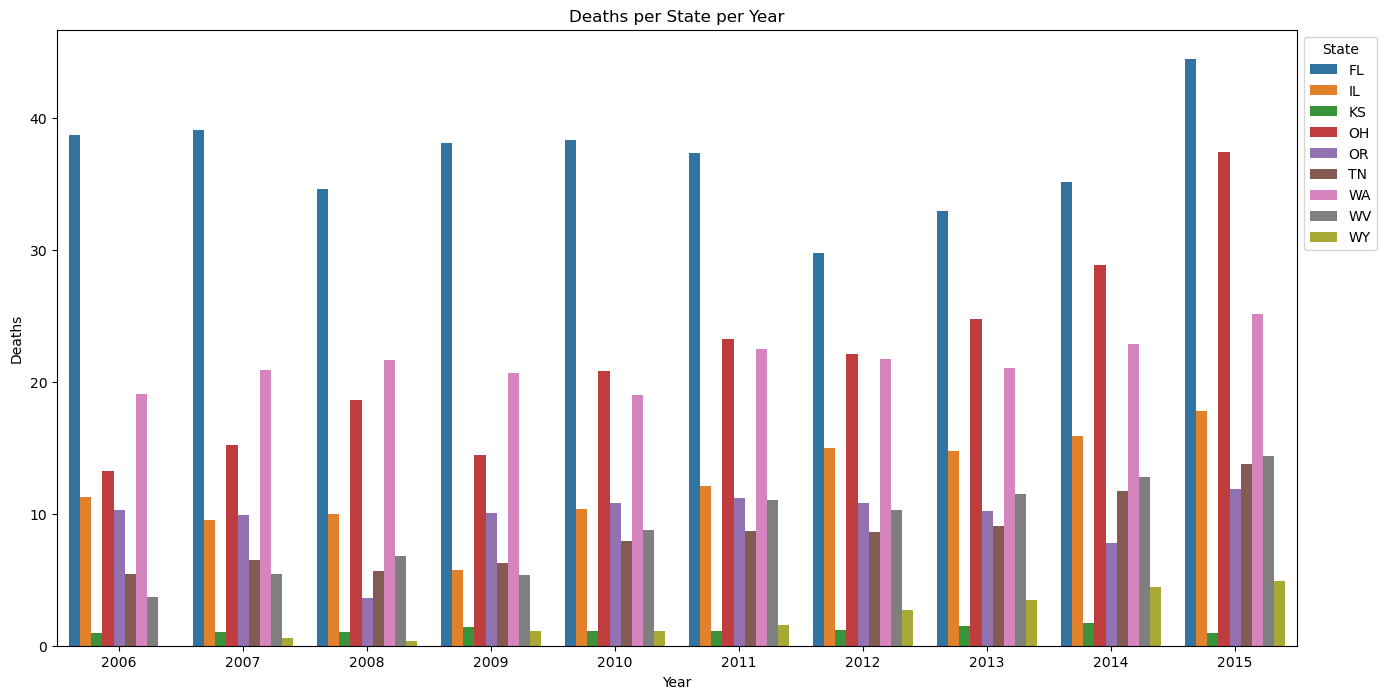

In [93]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'imputation_data' is your DataFrame
# ... (previous code for imputation and rounding)

plt.figure(figsize=(16, 8))
sns.barplot(x="Year", y="Deaths_df1", hue="State", data=filled_data, ci=None)
plt.xlabel("Year")
plt.ylabel("Deaths")
plt.title("Deaths per State per Year")
plt.legend(title="State", bbox_to_anchor=(1, 1))
plt.show()

C:\Users\khsqu\AppData\Local\Temp\ipykernel_788\2640911724.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x="Year", y="Deaths", hue="State", data=all_data, ci=None)
c:\Miniconda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Miniconda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Miniconda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Miniconda\Lib\site-packages\seabor

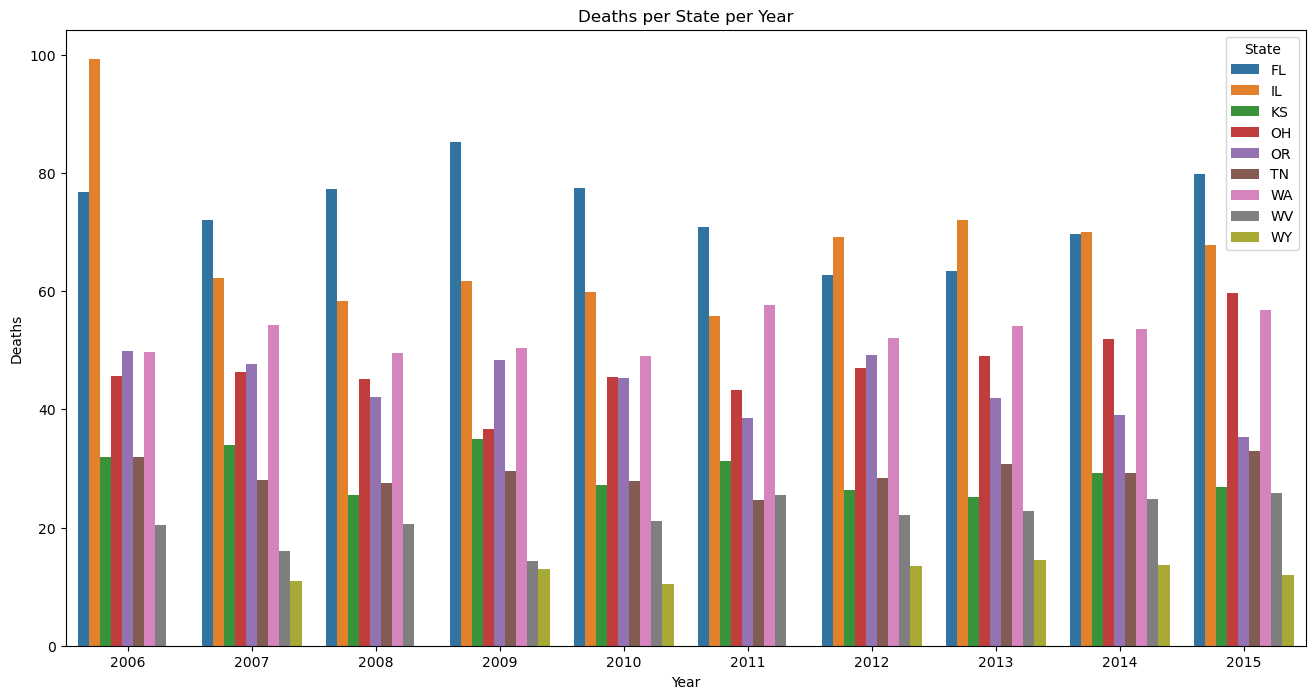

In [96]:
plt.figure(figsize=(16, 8))
sns.barplot(x="Year", y="Deaths", hue="State", data=all_data, ci=None)
plt.xlabel("Year")
plt.ylabel("Deaths")
plt.title("Deaths per State per Year")
plt.legend(title="State", bbox_to_anchor=(1, 1))
plt.show()

In [98]:
filled_data.to_parquet(
    r"C:\PDS\opioid-2023-kml\00_Data\Deaths_Data\filled_deaths.parquet", index=False
)